In [1]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import tree
import pickle
from sklearn.model_selection import GridSearchCV

In [2]:
#read Data
data = pd.read_csv("data.csv")
target = pd.read_csv("target.csv")

In [3]:
data.head()

,Gender,Age,Month,Hour
0,1,37,12,10
1,0,50,5,11
2,0,21,7,14
3,0,56,5,15
4,1,40,10,20


In [4]:
target.head()

,Target
0,18
1,18
2,2
3,18
4,17


In [5]:
#Split data in test and train
X_train, X_test, Y_train, Y_test = train_test_split(data, target, random_state=0)

In [6]:
#Set Parameters to check
params = {
    'max_leaf_nodes': list(range(2,100)),
    'min_samples_split': [2,3,4,5,6],
    'criterion': ["gini","entropy"],
    'splitter': ["best", "random"],
    'max_depth': list(range(2,100))
}

In [7]:
#Start fitting with all combinations of Parameters
clf = GridSearchCV(DecisionTreeClassifier(random_state = 42), params, verbose = 1, cv = 3, n_jobs=6)
clf.fit(X_train, Y_train)

Fitting 3 folds for each of 192080 candidates, totalling 576240 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 3538 tasks      | elapsed:    7.3s
[Parallel(n_jobs=6)]: Done 11538 tasks      | elapsed:   19.1s
[Parallel(n_jobs=6)]: Done 22738 tasks      | elapsed:   36.2s
[Parallel(n_jobs=6)]: Done 37138 tasks      | elapsed:   58.2s
[Parallel(n_jobs=6)]: Done 54738 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 75538 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 99538 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 126738 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 157138 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 190738 tasks      | elapsed:  4.9min
[Parallel(n_jobs=6)]: Done 227538 tasks      | elapsed:  5.9min
[Parallel(n_jobs=6)]: Done 267538 tasks      | elapsed:  6.9min
[Parallel(n_jobs=6)]: Done 310738 tasks      | elapsed:  8.0min
[Parallel(n_jobs=6)]: Done 357138 tasks 

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29, 30, 31, ...],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']},
             verbose=1)

In [8]:
#Show best Parameters
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=25,
                       random_state=42)

In [9]:
#Check score for Parameters
clf.score(X_test,Y_test)

0.638

In [10]:
#Check predict_proba method
clf.predict_proba([[0,21,7,14]])

array([[0.        , 0.        , 0.21333333, 0.78666667, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [11]:
#Check predict method
clf.predict([[0,21,7,14]])

array([3])

In [12]:
#Recheck with best Parameters set manually
dt = DecisionTreeClassifier(random_state = 42, max_depth=7, max_leaf_nodes=25, criterion="entropy")
dt.fit(X_train, Y_train)
dt.score(X_test,Y_test)

0.638

In [14]:
#Check children left
dt.tree_.children_left

array([ 1,  3,  5,  9,  7, 13, 11, 17, 25, 19, 15, -1, 27, 31, -1, 21, -1,
       35, 29, 23, -1, -1, -1, -1, -1, 45, -1, -1, 41, 37, 43, 33, -1, 39,
       -1, -1, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [15]:
#Check children right
dt.tree_.children_right

array([ 2,  4,  6, 10,  8, 14, 12, 18, 26, 20, 16, -1, 28, 32, -1, 22, -1,
       36, 30, 24, -1, -1, -1, -1, -1, 46, -1, -1, 42, 38, 44, 34, -1, 40,
       -1, -1, 48, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [16]:
#Check Threshold for decision nodes
dt.tree_.threshold

array([59.5, 30.5, 17.5, 17.5, 17.5,  0.5,  0.5,  0.5, 58.5,  0.5,  0.5,
       -2. , 98.5,  2.5, -2. , 18.5, -2. , 42.5, 14.5, 19.5, -2. , -2. ,
       -2. , -2. , -2. ,  4.5, -2. , -2. ,  9. ,  2.5, 58.5, 77. , -2. ,
       61.5, -2. , -2. , 13.5, -2. , -2. , -2. , -2. , -2. , -2. , -2. ,
       -2. , -2. , -2. , -2. , -2. ])

In [17]:
#Check features
dt.tree_.feature

array([ 1,  1,  3,  3,  3,  0,  0,  0,  1,  0,  0, -2,  1,  2, -2,  1, -2,
        1,  3,  1, -2, -2, -2, -2, -2,  2, -2, -2,  2,  2,  1,  1, -2,  1,
       -2, -2,  3, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2])

In [18]:
#Check amount of data in nodes
dt.tree_.value

array([[[ 37.,  39.,  44., 119., 100., 136., 284., 193.,  55., 102.,
         228., 163.]],

       [[ 37.,  39.,  44., 119.,   0.,   0.,   0.,   0.,  55., 102.,
         228., 163.]],

       [[  0.,   0.,   0.,   0., 100., 136., 284., 193.,   0.,   0.,
           0.,   0.]],

       [[ 37.,  39.,  44., 119.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.]],

       [[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  55., 102.,
         228., 163.]],

       [[  0.,   0.,   0.,   0.,   0.,   0., 284., 193.,   0.,   0.,
           0.,   0.]],

       [[  0.,   0.,   0.,   0., 100., 136.,   0.,   0.,   0.,   0.,
           0.,   0.]],

       [[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         228., 163.]],

       [[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  55., 102.,
           0.,   0.]],

       [[  0.,   0.,  44., 119.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.]],

       [[ 37.,  39.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
 

In [19]:
#Create Pseudo Code for Tree
def tree_to_pseudo(tree, feature_names):

    '''
    Outputs a decision tree model as if/then pseudocode
    
    Parameters:
    -----------
    tree: decision tree model
        The decision tree to represent as pseudocode
    feature_names: list
        The feature names of the dataset used for building the decision tree
    '''

    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth=0):
        indent = "  " * depth
        if (threshold[node] != -2):
            print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
            if left[node] != -1:
                recurse (left, right, threshold, features, left[node], depth+1)
                print(indent,"} else {")
                if right[node] != -1:
                    recurse (left, right, threshold, features, right[node], depth+1)
                print(indent,"}")
        else:
            print(indent,"return " + str(value[node]))

    recurse(left, right, threshold, features, 0)
    
tree_to_pseudo(dt,data.columns)

 if ( Age <= 59.5 ) {
   if ( Age <= 30.5 ) {
     if ( Hour <= 17.5 ) {
       if ( Gender <= 0.5 ) {
         if ( Age <= 19.5 ) {
           return [[ 0.  0.  0. 15.  0.  0.  0.  0.  0.  0.  0.  0.]]
         } else {
           return [[ 0.  0. 16. 59.  0.  0.  0.  0.  0.  0.  0.  0.]]
         }
       } else {
         return [[ 0.  0. 28. 45.  0.  0.  0.  0.  0.  0.  0.  0.]]
       }
     } else {
       if ( Gender <= 0.5 ) {
         if ( Age <= 18.5 ) {
           return [[0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
         } else {
           return [[26.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
         }
       } else {
         return [[11. 29.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
       }
     }
   } else {
     if ( Hour <= 17.5 ) {
       if ( Gender <= 0.5 ) {
         if ( Age <= 42.5 ) {
           return [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 61. 19.]]
         } else {
           if ( Hour <= 13.5 ) {
             return [[ 0.  0.  0.  0.  0.  0.  0.  0. 

[Text(2688.28125, 4206.428571428572, 'X[1] <= 59.5\nentropy = 3.317\nsamples = 1500\nvalue = [37, 39, 44, 119, 100, 136, 284, 193, 55, 102, 228\n163]'),
 Text(1501.5625, 3559.285714285714, 'X[1] <= 30.5\nentropy = 2.706\nsamples = 787\nvalue = [37, 39, 44, 119, 0, 0, 0, 0, 55, 102, 228, 163]'),
 Text(645.8333333333333, 2912.1428571428573, 'X[3] <= 17.5\nentropy = 1.794\nsamples = 239\nvalue = [37, 39, 44, 119, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(387.5, 2265.0, 'X[0] <= 0.5\nentropy = 0.841\nsamples = 163\nvalue = [0, 0, 44, 119, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(258.3333333333333, 1617.8571428571431, 'X[1] <= 19.5\nentropy = 0.675\nsamples = 90\nvalue = [0, 0, 16, 74, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(129.16666666666666, 970.7142857142858, 'entropy = 0.0\nsamples = 15\nvalue = [0, 0, 0, 15, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(387.5, 970.7142857142858, 'entropy = 0.748\nsamples = 75\nvalue = [0, 0, 16, 59, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(516.6666666666666, 1617.8571428571431, 'entropy = 0.961\

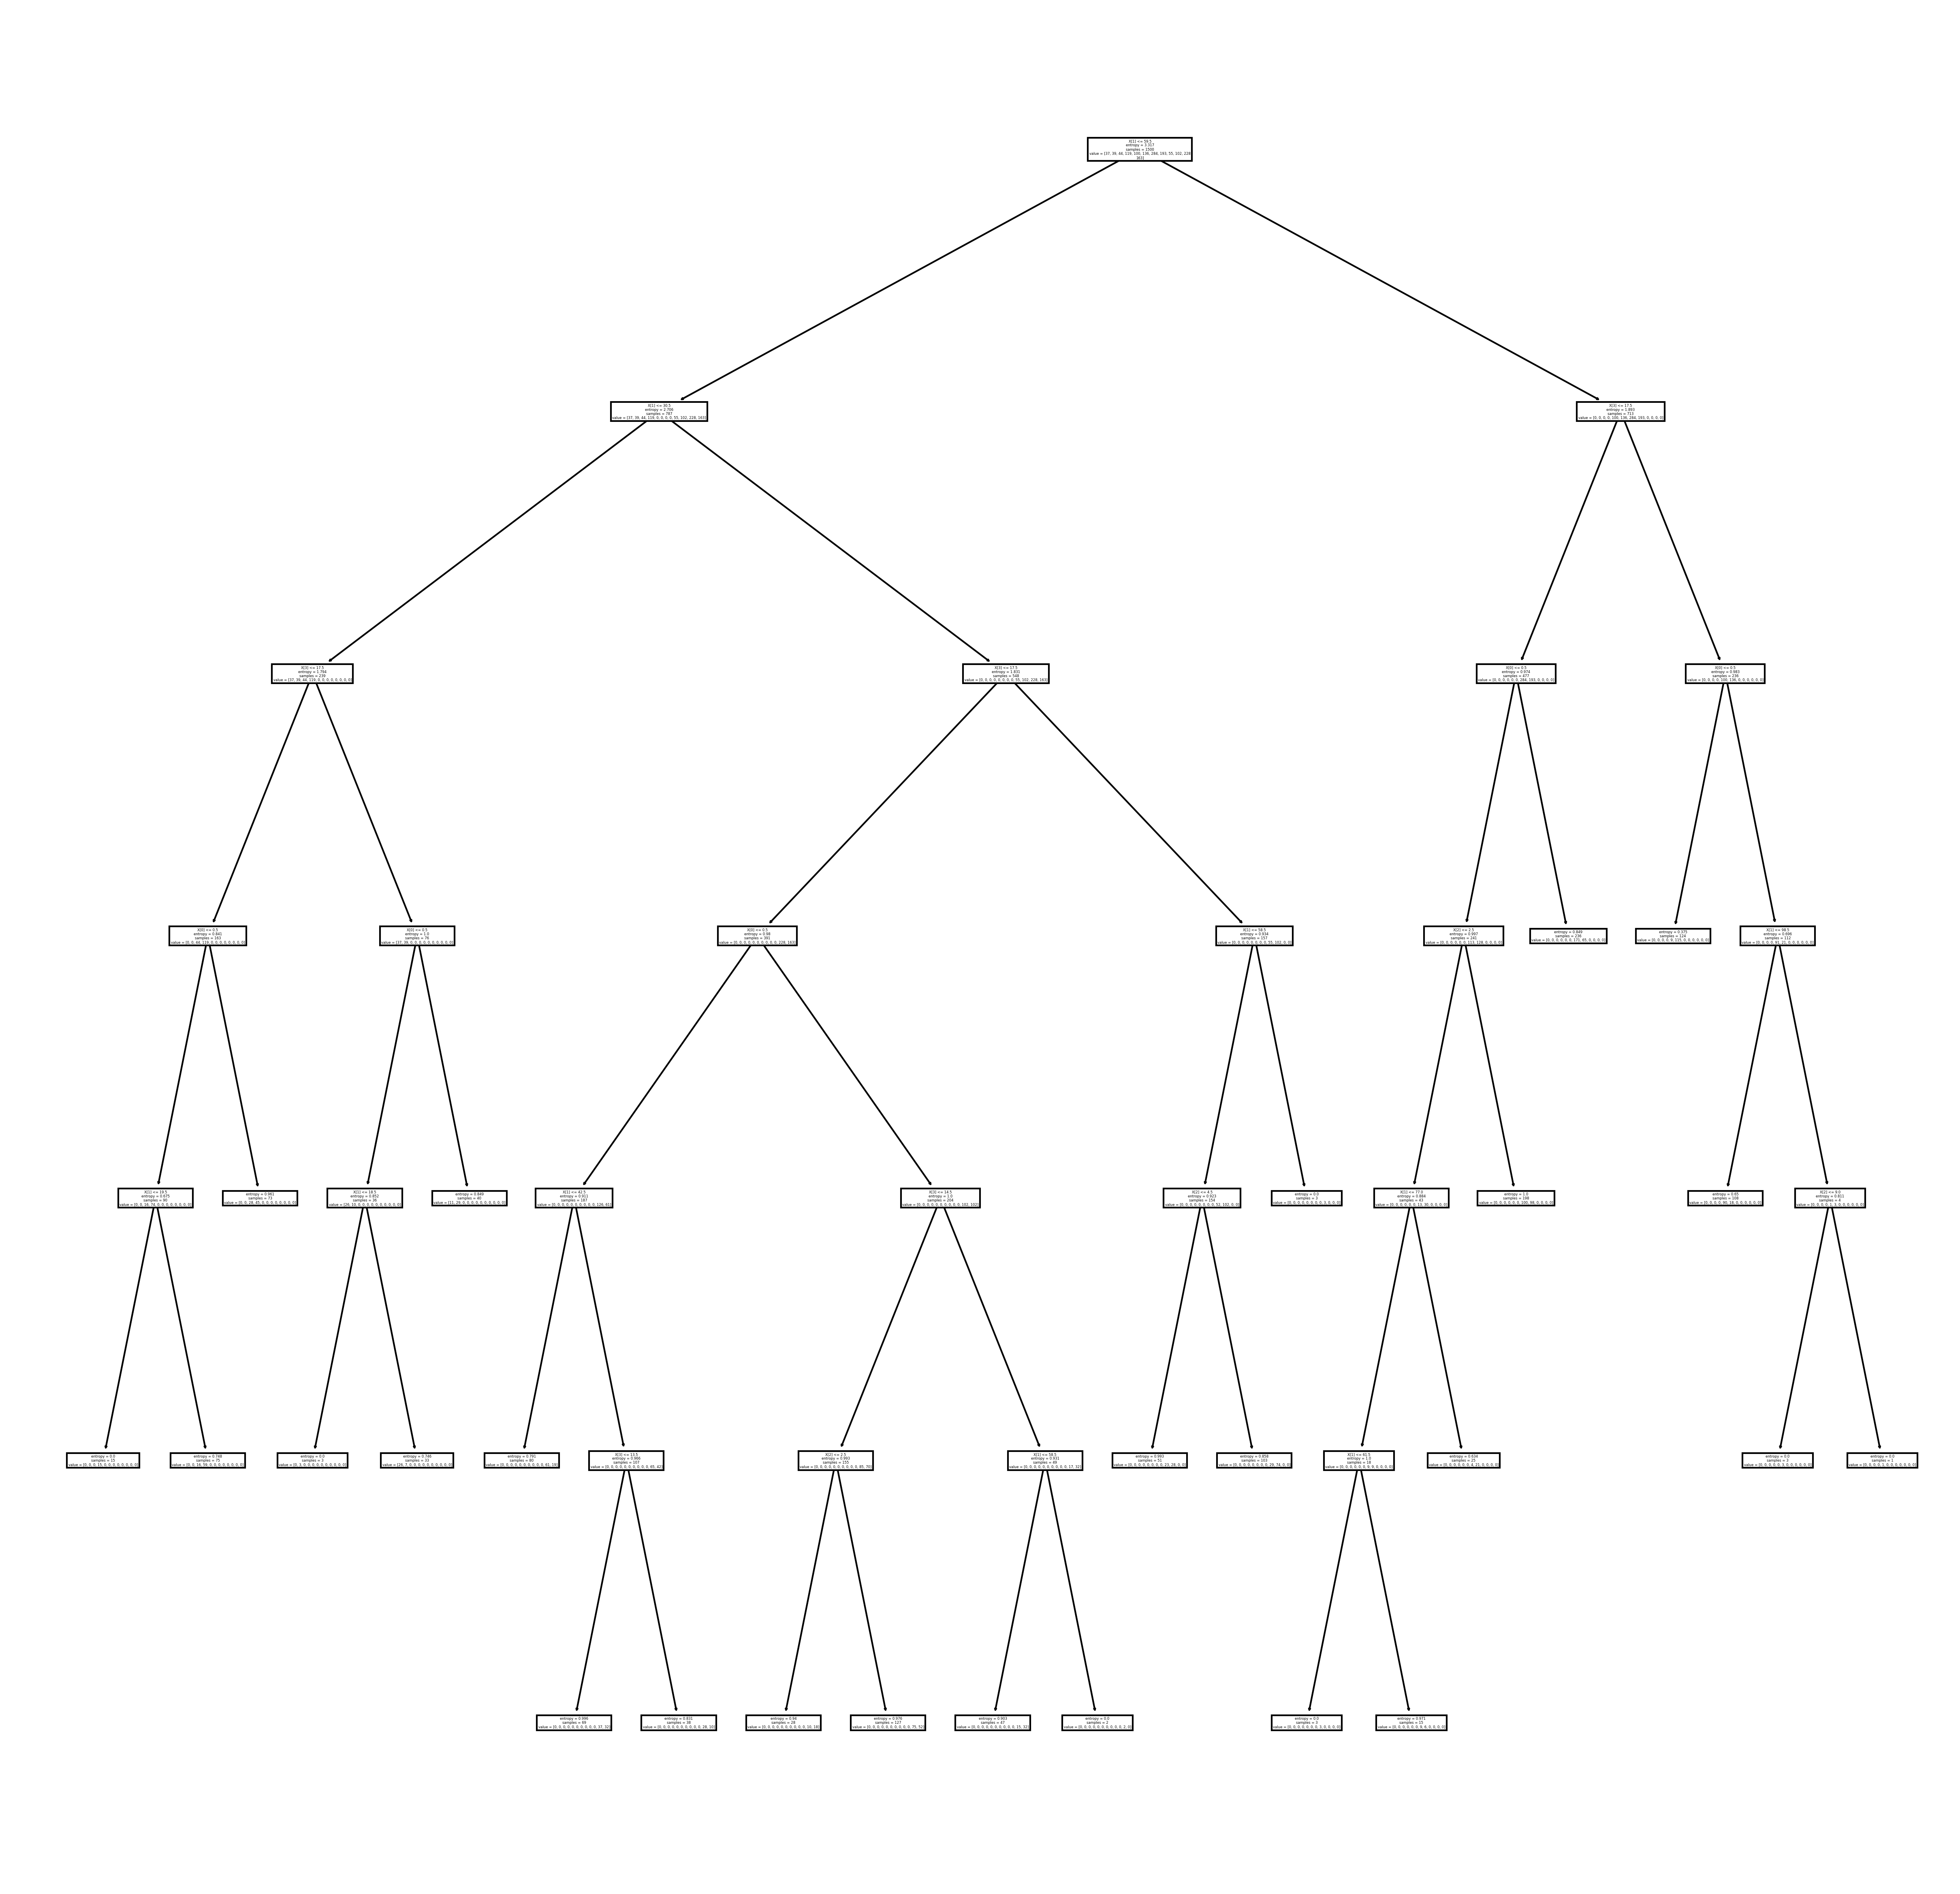

In [21]:
#Plot Tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=300)
tree.plot_tree(dt)

In [13]:
#Save Decision Tree
with open("decision_tree.pkl", 'wb') as file:
    pickle.dump(dt, file)